

# Project: Investigate IMDB DATA SET Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> IMDb (Internet Movie Database) is an online database of information related to films, television programs, home videos and video games, and internet streams, including cast, production crew and personnel biographies, plot summaries, trivia, and fan reviews and ratings. An additional fan feature, message boards, was abandoned in February 2017. Originally a fan-operated website, the database is owned and operated by IMDb.com, Inc., a subsidiary of Amazon..

> We are Preforming Analysis on the Part of this IMBD Dataset.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Total Number of Movies in DataSet

In [2]:
df.shape[0]

10866

## Total Columns in the DATA

In [2]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

## DATA type of the each column in the Data

In [3]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

# FINDING and Ploting which years most number of movies Release

    release_year  Count
54          2014    700
53          2013    659
55          2015    629
52          2012    588
51          2011    540
49          2009    533
48          2008    496
50          2010    490
47          2007    438
46          2006    408


Text(0.5, 1.0, 'Years and Number of Movies Release')

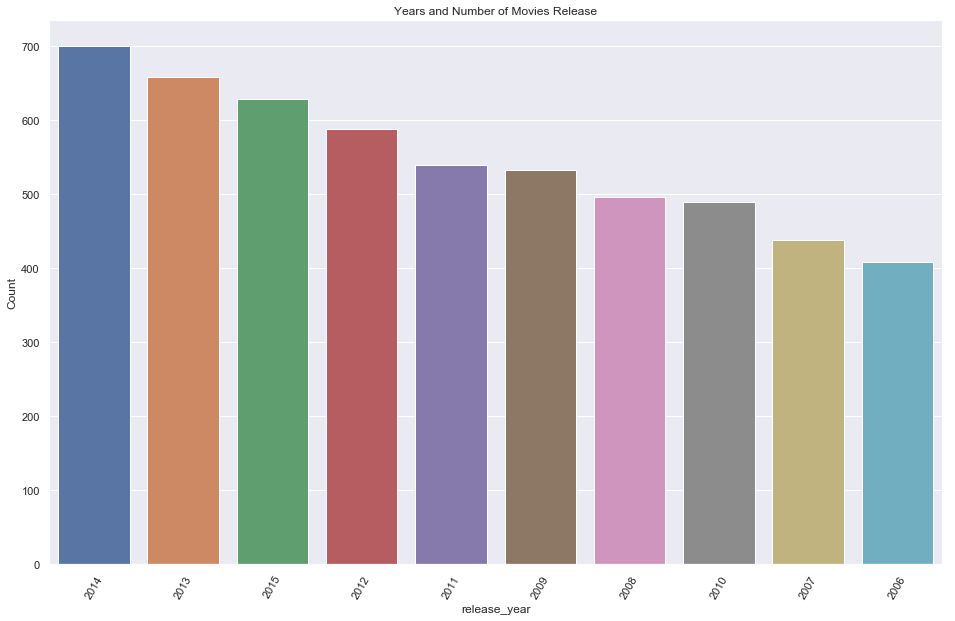

In [3]:
a = df.groupby('release_year').size()
a = pd.DataFrame(a)
a.reset_index(level=0, inplace=True)
a.columns = ['release_year', 'Count']
a = a.sort_values(by='Count', ascending=False)
print(a.iloc[:10])
plt.figure(figsize=(16,10))
sns.barplot(x='release_year',y='Count',data=a.iloc[:10],order=a.iloc[:10].release_year)
plt.xticks(rotation=60);
plt.title("Years and Number of Movies Release")

# Checking the number of genres of movies in total in the imdb Data

In [4]:
genres = df['genres'].str.split('|',expand=True).reset_index(drop=True).stack().reset_index(drop=True).unique().tolist()

In [5]:
print("The Different genres in the Movies")
for genre in genres:
    print(genre)

The Different genres in the Movies
Action
Adventure
Science Fiction
Thriller
Fantasy
Crime
Western
Drama
Family
Animation
Comedy
Mystery
Romance
War
History
Music
Horror
Documentary
TV Movie
Foreign


# Manulating the Data on Genres and Creating the Column in Data for each genre to check whether that movie is belong to that genre or Not

In [6]:
for genre in genres:
    df[genre] = df['genres'].dropna().str.match(genre)

In [7]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,False,False,False,False,False,False,False,False,False,False


## Finding Number of Movies Count for Each Genre

In [8]:
movie = {}
for genre in genres:
    movie[genre] = df[genre].value_counts()[True]
    print("Number of movies with {} genre is {}".format(genre,df[genre].value_counts()[True]))

Number of movies with Action genre is 1590
Number of movies with Adventure genre is 586
Number of movies with Science Fiction genre is 214
Number of movies with Thriller genre is 491
Number of movies with Fantasy genre is 272
Number of movies with Crime genre is 381
Number of movies with Western genre is 42
Number of movies with Drama genre is 2453
Number of movies with Family genre is 144
Number of movies with Animation genre is 403
Number of movies with Comedy genre is 2319
Number of movies with Mystery genre is 125
Number of movies with Romance genre is 186
Number of movies with War genre is 59
Number of movies with History genre is 44
Number of movies with Music genre is 100
Number of movies with Horror genre is 915
Number of movies with Documentary genre is 432
Number of movies with TV Movie genre is 78
Number of movies with Foreign genre is 9


# Count the Bar Plot of Total Number of Movies of each Genre

Text(0.5, 1.0, 'Genre and Number of Movies')

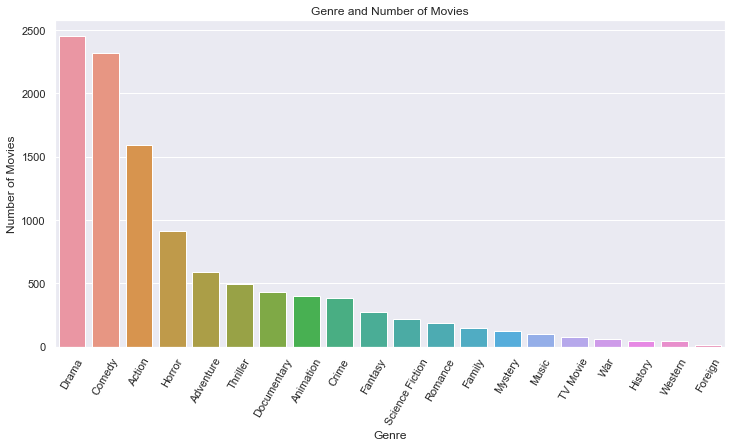

In [9]:
movie_count = pd.DataFrame(list(movie.items()),columns=["Genre","Number of Movies"])
movie_count.sort_values(by="Number of Movies",ascending=False,inplace=True)
plt.figure(figsize=(12,6))
sns.barplot(x='Genre',y='Number of Movies',data=movie_count)
plt.xticks(rotation=60);
plt.title("Genre and Number of Movies")

## Total Actors in the IMDB Data

In [18]:
actors = df['cast'].str.split('|',expand=True).reset_index(drop=True).stack().reset_index(level=1,drop=True).unique()

# Now Finding the Best Actor in the IMDB Record on the Basis of Number of Movies and Average Rating each of the Movie

In [20]:
actorrating = {}
actormovies= {}
for actor in actors:
    actorrating[actor] = df[(df['vote_average'] > 6) & (df['cast'].dropna().str.contains(actor))]['vote_average'].mean()
    actormovies[actor] = df[(df['vote_average'] > 6) & (df['cast'].dropna().str.contains(actor))].shape[0]
    
actor_rating = pd.DataFrame(list(actorrating.items()),columns=['Actor','Average_Rating'])
actor_movies = pd.DataFrame(list(actormovies.items()),columns=['Actor','Number of Movies'])
actor_rating = actor_rating.merge(actor_movies,left_on='Actor',right_on='Actor',how = 'inner')

In [22]:
actor_rating1 = actor_rating.copy()

In [23]:
actor_rating['Rating_Score'] = actor_rating['Average_Rating']*actor_rating['Number of Movies']
actor_rating = actor_rating.sort_values(by="Rating_Score",ascending=False)
actor_rating.reset_index(drop=True,inplace=True)
actor_rating.head(10)

,Actor,Average_Rating,Number of Movies,Rating_Score
0,Adam,6.709756,41,275.1
1,Matt Damon,6.941176,17,118.0
2,Brad Pitt,6.980000,15,104.7
3,Tom Hanks,6.964286,14,97.5
4,Robert Downey Jr.,6.785714,14,95.0
5,Mars,6.521429,14,91.3
6,Anne Hathaway,6.961538,13,90.5
7,Morgan Freeman,6.861538,13,89.2
8,Jessica Chastain,6.738462,13,87.6
9,Harrison Ford,7.241667,12,86.9


## Recommation of Movies on the Actor Basis

In [31]:
def actor_movie_recommation(actor):
    movie = df[df['cast'].str.contains(actor)][['original_title','vote_average','cast']].sort_values(by='vote_average',ascending=False)\
                                                .reset_index(drop=True)
    movie['cast'] = movie['cast'].str.replace(actor,"")
    movie['cast'] = movie['cast'].str.replace('\|\|','|')
    movie = movie.join(movie['cast'].str.strip('|').str.split('|',expand=True))
    movie.rename(columns={0:'Actor1',1:'Actor2',2:'Acotr3',3:'Actor4',4:'Actor5'},inplace=True)
    movie.drop(columns='cast',axis=1,inplace=True)
    return movie

In [93]:
actor_movie_recommation("Chris Pratt")

,original_title,vote_average,Actor1,Actor2,Acotr3,Actor4
0,Guardians of the Galaxy,7.9,Zoe Saldana,Dave Bautista,Vin Diesel,Bradley Cooper
1,Moneyball,6.9,Brad Pitt,Jonah Hill,Robin Wright,Philip Seymour Hoffman
2,Jurassic World,6.5,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
3,Zero Dark Thirty,6.5,Jessica Chastain,Jason Clarke,Mark Strong,Joel Edgerton
4,What's Your Number?,6.2,Chris Evans,Anna Faris,Martin Freeman,Ari Graynor
5,Bride Wars,5.8,Anne Hathaway,Kate Hudson,Bryan Greenberg,Steve Howey
6,The Five-Year Engagement,5.6,Emily Blunt,Alison Brie,Jason Segel,Rhys Ifans


## Recommation of Movies on the Basis of Multiple Actor

In [34]:
def actor_movie_recommation1(**kwargs):
    i = 1
    for key, value in kwargs.items():
        if ~df.empty & i == 1:
            movie = df[df['cast'].str.contains(value)]
            i = 2
        elif ~movie.empty & i >= 2:
            movie = movie[movie['cast'].str.contains(value)]
        
    movie = movie[['original_title','vote_average','cast']].sort_values(by='vote_average',ascending=False)\
                                                 .reset_index(drop=True)
    movie = movie.join(movie['cast'].str.strip('|').str.split('|',expand=True))
    movie.rename(columns={0:'Actor1',1:'Actor2',2:'Acotr3',3:'Actor4',4:'Actor5'},inplace=True)
    movie.drop(columns='cast',axis=1,inplace=True)
    return movie

In [38]:
actor_movie_recommation1(Actor1="Brad Pitt",Actor2="George Clooney",Actor3="Matt Damon")

,original_title,vote_average,Actor1,Actor2,Acotr3,Actor4,Actor5
0,Ocean's Eleven,7.0,George Clooney,Brad Pitt,Matt Damon,Andy GarcÃ­a,Julia Roberts
1,Ocean's Thirteen,6.4,George Clooney,Brad Pitt,Matt Damon,Al Pacino,Bernie Mac


## Checking the Rating and Number of Movies Destribution

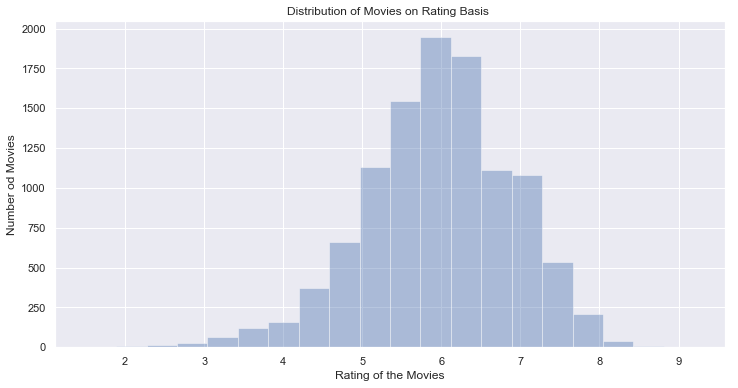

In [13]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.shape
plt.figure(figsize=(12,6))
sns.distplot(df['vote_average'],bins=20,kde=False)
plt.title("Distribution of Movies on Rating Basis ")
plt.xlabel("Rating of the Movies")
plt.ylabel("Number od Movies");

## Checking Average Rating Yearly

In [14]:
df1 = pd.DataFrame(df.groupby('release_year')['vote_average'].mean())

In [15]:
df1.rename(columns={'vote_average':'year_average_rating'},inplace= True)
df1.reset_index(inplace= True)

df_combined = df.merge(df1,left_on='release_year',right_on='release_year',how = 'inner')
df_combined.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign,year_average_rating
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,False,False,False,False,False,False,False,False,False,5.885692
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,False,False,False,False,False,False,False,False,False,5.885692
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,False,False,False,False,False,False,False,False,False,5.885692
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,False,False,False,False,False,False,False,False,False,5.885692
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,False,False,False,False,False,False,False,False,False,5.885692


## Plot Rating Average of all the Movies on the Yearly Basis

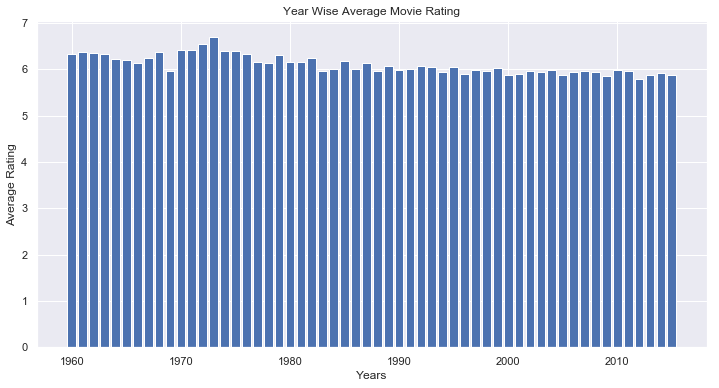

In [18]:
plt.figure(figsize=(12,6))
plt.bar(df_combined.release_year,df_combined.year_average_rating)
plt.title("Year Wise Average Movie Rating")
plt.xlabel("Years")
plt.ylabel("Average Rating")
plt.show()

Movies release each Year

## Now Checking How much the Audience Like the Particular Genre or Not

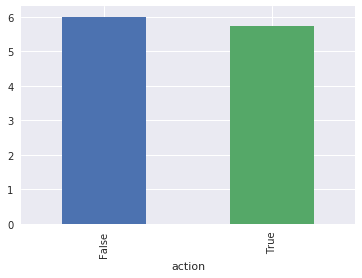

In [15]:
df.groupby("action").mean()["vote_average"].plot(kind='bar')

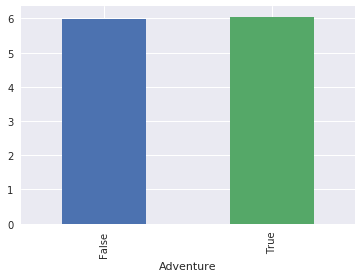

In [16]:
df['Adventure'] = df['genres'].dropna().str.match("Adventure")
k = df.groupby("Adventure").mean()["vote_average"].plot(kind='bar')


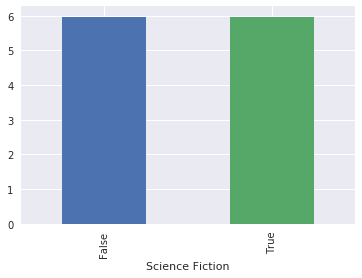

In [17]:
df['Science Fiction'] = df['genres'].dropna().str.match("Science Fiction")
df.groupby("Science Fiction").mean()["vote_average"].plot(kind='bar')

5.63441955193


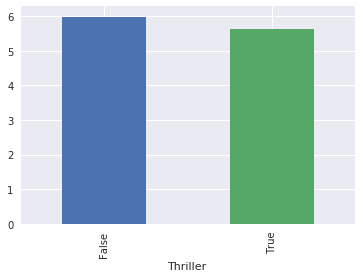

In [18]:
df['Thriller'] = df['genres'].dropna().str.match("Thriller")
df.groupby("Thriller").mean()["vote_average"].plot(kind='bar')
k = df.groupby("Thriller").mean()["vote_average"]
print(k[1])

5.882923674


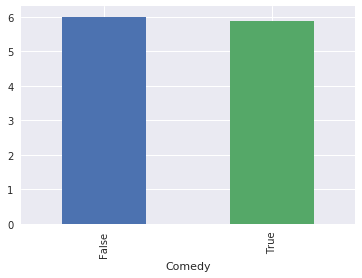

In [19]:
df['Comedy'] = df['genres'].dropna().str.match("Comedy")
df.groupby("Comedy").mean()["vote_average"].plot(kind='bar')
k = df.groupby("Comedy").mean()["vote_average"]
print(k[1])

## Now Checking the Histgram of Average Rating Verse Number of Movies

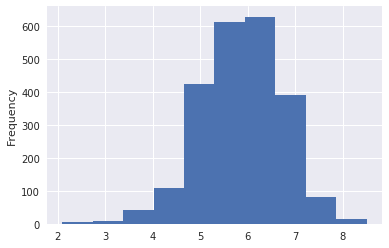

In [20]:
df.query('Comedy == True')['vote_average'].reset_index(drop=True).plot(kind='hist')

## Best Director of the Comedy Movies

In [21]:
df.query('Comedy == True & vote_average > 8')['director']

4179               Robert Zemeckis
4879                     Jay Karas
4934    Ryan Polito|Jake Szymanski
6441                 Ã‡aÄŸan Irmak
6942               Rajkumar Hirani
8370                   Chris Bould
8839                   Stan Lathan
Name: director, dtype: object

## Much More Analysis and More Recommandion can be Done on this Dataset